<a href="https://colab.research.google.com/github/Dawon00/Deep_Learning_Seminar/blob/master/210406_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# python

In [2]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
y = cancer.target

# 속성별 평균
m = cancer.data.mean(axis=0)
# 속성별 표준편차
s = cancer.data.std(axis=0)
# 정규 데이터
x = (cancer.data - m)/s

print(x.shape, y.shape)


(569, 30) (569,)


In [3]:
x[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

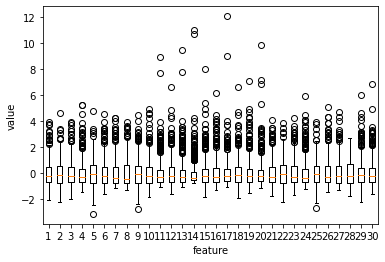

In [4]:
import matplotlib.pyplot as plt

plt.boxplot(x)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [5]:
import numpy as np

np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357]))

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 22) #test : train = 2: 8
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

np.unique(y_train, return_counts = True)

(455, 30) (455,)
(114, 30) (114,)


(array([0, 1]), array([170, 285]))

In [7]:
class LogisticRegression:
  def __init__(self):
    self.W = None
    self.b = None

  def forpass(self, x):
    z = np.sum(x * self.W) + self.b
    return z

  def sigmoid(self, z):
    a = 1 / (1 + np.exp(-z))
    return a
  
  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def fit(self, x, y):
    self.W = np.ones(x.shape[1])
    self.b = 0

    for i in range(20000 + 1):
      for x_i, y_i in zip(x, y):
        z = self.forpass(x_i)
        a = self.sigmoid(z)
        err = (y_i - a)
        w_grad, b_grad = self.backprop(x_i, err)
        self.W -= w_grad
        self.b -= b_grad

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.sigmoid(np.array(z))
    return a > 0.5


In [8]:
neuron = LogisticRegression()
neuron.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


In [9]:
np.mean(neuron.predict(x_test) == y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


0.14035087719298245

#tensorflow

In [10]:
import tensorflow as tf

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units = 1, input_dim = x_train.shape[1], activation='sigmoid'))#units = output shape, input_dim은 들어오는 데이터의 차원
tf.model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.003), metrics=['accuracy'])
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = tf.model.fit(x_train, y_train, epochs = 100)#history에 오차와 정확도가 담긴다

Epoch 1/100
15/15 [==============================] - 1s 1ms/step - loss: 0.5134 - accuracy: 0.7780
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4536 - accuracy: 0.8299
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4633 - accuracy: 0.8219
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.8180
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4717 - accuracy: 0.8147
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.8304
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4021 - accuracy: 0.8329
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3800 - accuracy: 0.8315
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3480 - accuracy: 0.8604
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8584
Epoch 11/

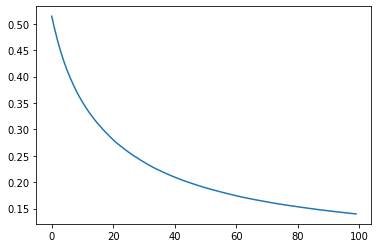

In [12]:
plt.plot(history.history['loss'])
plt.show()

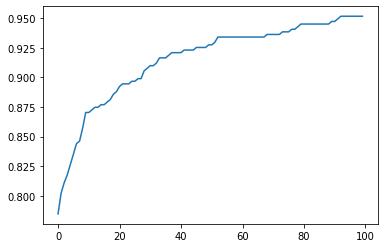

In [13]:
plt.plot(history.history['accuracy'])
plt.show()

In [14]:
print('Acc : ', history.history['accuracy'][-1])

Acc :  0.9516483545303345


In [15]:
predict = tf.model.predict([x_test])
y_predict = [1 if i > 0.5 else 0 for i in predict]
np.mean(y_predict == y_test)

0.9210526315789473